In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
vessel_name = "OOCL_LUXEMBRUG"

# 전항지 출항 확인

전항지 출항 지점 확인

In [3]:
import os
 
path_dir = 'voy_path'
 
file_list = os.listdir(path_dir)
file_new_list = []
for i in file_list:
    if "portmis" in i:
        file_new_list.append(i)

In [4]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

# 시각화 툴로 processed된 것들 확인

항로 클러스터링

In [5]:
# dense_upper_china_list = ['COSCO_FOS_VRKR6_23processed'
# ,'AKA_BHUM_9V7282_7processed'
# , 'COSCO_FOS_VRKR6_25processed'
# , 'MSC_LA_SPEZIA_DIGX2_2processed'
# , 'OOCL_NEW_YORK_VRJS2_2processed'
# , 'MSC_WASHINGTON_5LDP4_4processed'
# , 'MSC_SOFIA_PAZ_D5FL9_2processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_26processed'
# , 'OOCL_HAMBURG_VRZK9_6processed'
# , 'SEAMAX_STRATFORD_V7EP2_6processed'
# , 'OOCL_LUXEMBOURG_VRGO3_5processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_25processed'
# , 'MSC_LUCIANA_3FTY3_4processed'
# , 'MSC_RENEE_VRPL2_5processed'
# , 'COSCO_FOS_VRKR6_24processed'
# , 'COSCO_FOS_VRKR6_20processed'
# , 'COSCO_FOS_VRKR6_26processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_23processed'
# , 'OOCL_HAMBURG_VRZK9_5processed']

# OOCL_LUXEMBOURG_voyages_list = [
#     'COSCO_FOS_VRKR6_2022_20processed', 'COSCO_FOS_VRKR6_2022_23processed',
#     'COSCO_FOS_VRKR6_2022_24processed', 'COSCO_FOS_VRKR6_2022_25processed',
#     'OOCL_LUXEMBOURG_VRGO3_2022_6processed', 'COSCO_FOS_VRKR6_2022_27processed',
#     'COSCO_FOS_VRKR6_2022_28processed', 'OOCL_LUXEMBOURG_VRGO3_2022_6processed',
#     'COSCO_FOS_VRKR6_2022_30processed'
# ]

# OOCL_LUXEMBOURG_voyages_list = [
#     'OOCL_LUXEMBOURG_VRGO3_2022_6processed', 'AKA_BHUM_9V7282_2022_8processed'
# ]
OOCL_LUXEMBOURG_voyages_list = [
    'OOCL_NEW_YORK_VRJS2_2022_1processed',
    'OOCL_LUXEMBOURG_VRGO3_2022_6processed',
    'OOCL_NEW_YORK_VRJS2_2022_3processed'
]

OOCL_LUXEMBOURG_voyages_list = [
    'OOCL_LUXEMBOURG_VRGO3_2022_5processed',
    'OOCL_LUXEMBOURG_VRGO3_2022_6processed'
]

OOCL_GENOA_voyages_list = [
    'OOCL_GENOA_VROK9_2022_3processed', 'OOCL_GENOA_VROK9_2022_5processed'
]

OOCL_HAMBURG_voyages_list = [
    'OOCL_HAMBURG_VRZK9_2022_5processed', 'OOCL_HAMBURG_VRZK9_2022_6processed'
]

SEAMAX_STRATFORD_voyages_list = [
    'SEAMAX_STRATFORD_V7EP2_2022_6processed',
    'SEAMAX_STRATFORD_V7EP2_2022_7processed'
]

ZIM_CHARLESTORN_voyages_list = [
    'ZIM_CHARLESTON_VRUC3_2022_6processed',
    'ZIM_CHARLESTON_VRUC3_2022_7processed'
]

single_voyage_list = [
    'MSC_ARIANE_3FDA3_2022_1processed', 'MSC_DANIT_3FZU8_2022_2processed',
    'MSC_EVA_3EVM7_2022_1processed', 'MSC_EXPRESS_III_A8LG7_2022_1processed',
    'MSC_KANOKO_D5TM3_2023_1processed', 'MSC_LA_SPEZIA_DIGX2_2022_2processed',
    'MSC_VANESSA_HOWD_2023_1processed', 'MSC_VIRGO_CQEB9_2023_2processed',
    'MSC_SOFIA_PAZ_D5FL9_2022_2processed',
    'MSC_WASHINGTON_5LDP4_2022_4processed',
    'MSC_RAVENNA_A8ZU8_2022_3processed', 'MSC_VANDYA_3FDW4_2022_2processed',
    'MSC_RENEE_VRPL2_2022_5processed', 'SEASPAN_OCEANIA_VRBI2_2023_1processed',
    'SEASPAN_BREEZE_VRNL8_2023_1processed', 'VALENCE_9HA3398_2023_1processed'
]

In [6]:
upper_china_path_dir = 'voy_path/upper_china/processed/'

In [7]:
# 가는 길인데 굳이 오래 돌아갈 필요는 없잖아 알고리즘
def optimal_next_point(current_position, shortest_point_idx, shortest_distance,
                       path_df):
    posi_c = current_position
    latitude_i = path_df.loc[shortest_point_idx, "latitude"]
    longitude_i = path_df.loc[shortest_point_idx, "longitude"]
    posi_i = (latitude_i, longitude_i)
    min_d = shortest_distance
    n = shortest_point_idx + 1
    while True:
        try:
            latitude_n = path_df.loc[n, "latitude"]
            longitude_n = path_df.loc[n, "longitude"]
            posi_n = (latitude_n, longitude_n)
            distance = haversine(posi_c, posi_n, unit="km")
            if n == shortest_point_idx + 1:
                path_distance = haversine(posi_i, posi_n, unit="km")
                paths_distance = path_distance
            else:
                path_distance = haversine(posi_n, posi_previous_n, unit="km")
                paths_distance += path_distance

            if distance < (paths_distance + min_d):
                optimal_next_point_idx = n
                return optimal_next_point_idx
            elif n == path_df.index[-1]:
                print("no better optimal_point")
                return shortest_point_idx + 1
            else:
                n = n + 1
                posi_previous_n = posi_n
        except:
            print("no better optimal_point")
            return shortest_point_idx + 1

In [8]:
# 인덱스 번호를 가지고 항로의 segment 번호를 찾음
# 만약 segment의 마지막 번호라면 seg_no를 하나 더한다.

def find_segment_no(optimal_point_idx, path_df, the_number_of_segment):
    seg_no = optimal_point_idx // (len(path_df) / the_number_of_segment)
    next_no = (optimal_point_idx + 1) // (len(path_df) / the_number_of_segment)
    if seg_no != next_no:
        return int(next_no)
    else:
        return int(seg_no)

In [9]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [10]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - hour) * 60)
    second = ((distance / km_h - hour) * 60 - minute) * 60
    duration = datetime.timedelta(hours=hour,minutes=minute, seconds=second)
    return duration

# Tianjin to Busan PNIT

## OOCL_NEW_YORK

In [11]:
coordinates_array = pd.DataFrame(data={"latitude" : [],"longitude" : []})

for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    coordinates_array = coordinates_array.append(df[["latitude","longitude"]], ignore_index=True)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from shapely.geometry import LineString

In [14]:
from scipy import interpolate
import pandas as pd

## below 3 knot 제거

In [15]:
interpolation_number = "12000"

### interpolation 12000

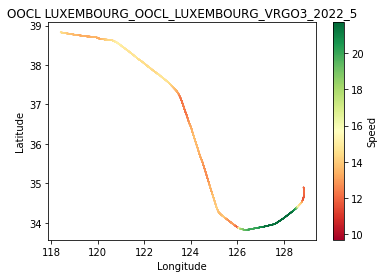

보간법 전 일반 평균 속도 : 14.587777777777776
보간법 전 일반 속도 표준편차: 2.633341347841563
보간법 전 저속 제거 평균 속도 : 14.587777777777776
보간법 전 저속 제거 속도 표준편차: 2.633341347841563
-
보간법 후 일반 평균 속도 : 14.59208854884634
보간법 후 일반 속도 표준편차: 2.5377997354377935
보간법 후 저속 제거 평균 속도 : 14.59208854884634
보간법 후 저속 제거 속도 표준편차: 2.5377997354377935


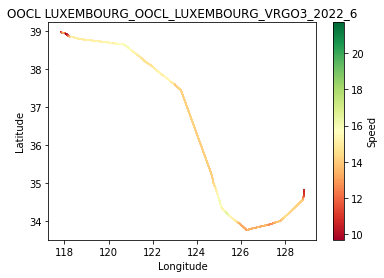

보간법 전 일반 평균 속도 : 14.675263157894738
보간법 전 일반 속도 표준편차: 1.2063677505481323
보간법 전 저속 제거 평균 속도 : 14.675263157894738
보간법 전 저속 제거 속도 표준편차: 1.2063677505481323
-
보간법 후 일반 평균 속도 : 14.392957897752112
보간법 후 일반 속도 표준편차: 1.0592265758663348
보간법 후 저속 제거 평균 속도 : 14.392957897752112
보간법 후 저속 제거 속도 표준편차: 1.0592265758663348


In [16]:
max_speed_list = []
min_speed_list = []
for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_LUXEMBOURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [17]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

[]

In [18]:
high_speed_path_data =[]
high_speed_path_data =[]
for i in OOCL_LUXEMBOURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [19]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [20]:
result_df_dict=  {
    "experiment_no" : [],
    "mean_speed" : [],
    "max_speed" : []
}

# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [21]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116271,38.896620,12.515503
2,1.666867e+09,118.117142,38.896489,12.531007
3,1.666867e+09,118.118013,38.896359,12.546510
4,1.666867e+09,118.118885,38.896228,12.562014
...,...,...,...,...
11995,1.667038e+09,128.857164,34.858224,11.351556
11996,1.667038e+09,128.857048,34.858943,11.351167
11997,1.667038e+09,128.856932,34.859662,11.350778
11998,1.667038e+09,128.856816,34.860381,11.350389


In [22]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 20

In [23]:
the_number_of_segment = 20

In [24]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [25]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [26]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.302810210641924
14.22881941108093
14.434573492580554
15.208909420312047
15.071873829077406
14.64944253641901
14.958520391920239
14.215471726526882
13.328816828897901
13.449752124319133
13.860445160382326
13.701552778605619
13.781523764788739
14.766556076278393
14.249444712006362
13.12452402394751
16.216213267872668
17.491106409050676
17.166707179041158
12.64340112223503


### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [27]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [28]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [29]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:40:20.718684
평균: 0 days 01:49:10.260196417


In [30]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
50,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.5968,38.2272,14.8,127.0,2022-11-24 10:01:51.360485,2022-11-24 00:58:12,2022-11-23 11:53:48,under way using engine,739.223284,1989.136123,2022-11-25 21:44:23.614184,2022-11-25 21:46:07.464304,0 days 00:01:43.850120
74,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,122.8391,37.6544,15.1,122.0,2022-11-24 14:34:25.357886,2022-11-24 05:26:17,2022-11-24 05:29:49,under way using engine,613.211348,1673.488327,2022-11-25 21:40:56.296477,2022-11-25 21:46:07.464304,0 days 00:05:11.167827
36,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,120.9220,38.5458,15.8,120.0,2022-11-24 07:35:28.970696,2022-11-23 22:33:11.000000,2022-11-23 10:17:45,under way using engine,807.719719,2283.022246,2022-11-25 21:40:52.883220,2022-11-25 21:46:07.464304,0 days 00:05:14.581084
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 21:40:29.568140,2022-11-25 21:46:07.464304,0 days 00:05:37.896164
49,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.5836,38.2348,14.7,127.0,2022-11-24 09:56:47.967472,2022-11-24 00:55:07.000000,2022-11-23 11:53:48,under way using engine,740.634804,1983.862861,2022-11-25 21:39:20.221171,2022-11-25 21:46:07.464304,0 days 00:06:47.243133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8741,33.9547,14.4,109.0,2022-11-25 08:54:17.199932,2022-11-24 23:51:44,2022-11-24 11:41:47,under way using engine,292.647256,773.569137,2022-11-25 18:20:55.297049,2022-11-25 21:46:07.464304,0 days 03:25:12.167255
130,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.2176,34.2820,15.6,122.0,2022-11-25 06:27:55.144093,2022-11-24 21:27:45.000000,2022-11-24 05:53:50,under way using engine,338.301080,946.398069,2022-11-25 18:16:38.372812,2022-11-25 21:46:07.464304,0 days 03:29:29.091492
166,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.4256,33.7854,13.4,77.0,2022-11-25 11:10:34.866932,2022-11-25 02:06:49.000000,2022-11-25 02:05:47,under way using engine,256.118725,651.266599,2022-11-25 18:14:11.960423,2022-11-25 21:46:07.464304,0 days 03:31:55.503881
152,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8369,33.9659,14.4,107.0,2022-11-25 08:44:12.188725,2022-11-24 23:43:41,2022-11-24 11:41:47,under way using engine,295.306764,780.599148,2022-11-25 18:10:50.285842,2022-11-25 21:46:07.464304,0 days 03:35:17.178462


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [31]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [32]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [33]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:40:20.718684
평균: 0 days 01:49:10.260196417


In [34]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
50,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.5968,38.2272,14.8,127.0,2022-11-24 10:01:51.360485,2022-11-24 00:58:12,2022-11-23 11:53:48,under way using engine,739.223284,1989.136123,2022-11-25 21:44:23.614184,2022-11-25 21:46:07.464304,0 days 00:01:43.850120
74,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,122.8391,37.6544,15.1,122.0,2022-11-24 14:34:25.357886,2022-11-24 05:26:17,2022-11-24 05:29:49,under way using engine,613.211348,1673.488327,2022-11-25 21:40:56.296477,2022-11-25 21:46:07.464304,0 days 00:05:11.167827
36,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,120.9220,38.5458,15.8,120.0,2022-11-24 07:35:28.970696,2022-11-23 22:33:11.000000,2022-11-23 10:17:45,under way using engine,807.719719,2283.022246,2022-11-25 21:40:52.883220,2022-11-25 21:46:07.464304,0 days 00:05:14.581084
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 21:40:29.568140,2022-11-25 21:46:07.464304,0 days 00:05:37.896164
49,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.5836,38.2348,14.7,127.0,2022-11-24 09:56:47.967472,2022-11-24 00:55:07.000000,2022-11-23 11:53:48,under way using engine,740.634804,1983.862861,2022-11-25 21:39:20.221171,2022-11-25 21:46:07.464304,0 days 00:06:47.243133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8741,33.9547,14.4,109.0,2022-11-25 08:54:17.199932,2022-11-24 23:51:44,2022-11-24 11:41:47,under way using engine,292.647256,773.569137,2022-11-25 18:20:55.297049,2022-11-25 21:46:07.464304,0 days 03:25:12.167255
130,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.2176,34.2820,15.6,122.0,2022-11-25 06:27:55.144093,2022-11-24 21:27:45.000000,2022-11-24 05:53:50,under way using engine,338.301080,946.398069,2022-11-25 18:16:38.372812,2022-11-25 21:46:07.464304,0 days 03:29:29.091492
166,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.4256,33.7854,13.4,77.0,2022-11-25 11:10:34.866932,2022-11-25 02:06:49.000000,2022-11-25 02:05:47,under way using engine,256.118725,651.266599,2022-11-25 18:14:11.960423,2022-11-25 21:46:07.464304,0 days 03:31:55.503881
152,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8369,33.9659,14.4,107.0,2022-11-25 08:44:12.188725,2022-11-24 23:43:41,2022-11-24 11:41:47,under way using engine,295.306764,780.599148,2022-11-25 18:10:50.285842,2022-11-25 21:46:07.464304,0 days 03:35:17.178462


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [35]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116271,38.896620,12.515503
2,1.666867e+09,118.117142,38.896489,12.531007
3,1.666867e+09,118.118013,38.896359,12.546510
4,1.666867e+09,118.118885,38.896228,12.562014
...,...,...,...,...
11995,1.667038e+09,128.857164,34.858224,11.351556
11996,1.667038e+09,128.857048,34.858943,11.351167
11997,1.667038e+09,128.856932,34.859662,11.350778
11998,1.667038e+09,128.856816,34.860381,11.350389


In [36]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 30

In [37]:
the_number_of_segment = 30

In [38]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [39]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [40]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.947056133927408
14.137948214688555
14.212440083968323
14.332941424556246
14.753541785953162
15.378741158829492
15.16788101900152
14.752134592150732
14.661958937092372
14.898831541806977
14.866557274674273
13.995599361189429
13.326085559049698
13.28633886952216
13.555429001253692
13.856677083010304
13.841772083030689
13.64454774244093
13.602334648763387
14.409886401382439
14.809898711454876
14.547926645230627
13.397187837229389
13.115838621470791
16.03367350324024
16.77003704570419
17.757268966440588
17.89874751101104
14.780081015416116
12.036333925487124


### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [41]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [42]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [43]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:53:44.357446
평균: 0 days 01:26:06.472283388


In [44]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 21:48:16.585479,2022-11-25 21:46:07.464304,0 days 00:02:09.121175
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 21:43:13.914050,2022-11-25 21:46:07.464304,0 days 00:02:53.550254
45,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.3904,38.3315,14.9,121.0,2022-11-24 09:16:29.630119,2022-11-24 00:11:50.000000,2022-11-23 11:53:48,under way using engine,760.546742,2056.016462,2022-11-25 21:40:24.608435,2022-11-25 21:46:07.464304,0 days 00:05:42.855869
19,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.7325,38.7832,15.0,97.0,2022-11-24 01:11:52.710289,2022-11-23 16:11:31.000000,2022-11-23 03:17:49,under way using engine,991.601768,2693.267236,2022-11-25 21:39:15.047417,2022-11-25 21:46:07.464304,0 days 00:06:52.416887
26,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,120.4416,38.6629,15.6,90.0,2022-11-24 06:04:40.029284,2022-11-23 21:03:11.000000,2022-11-23 08:53:52,under way using engine,850.867681,2380.304346,2022-11-25 21:37:44.828645,2022-11-25 21:46:07.464304,0 days 00:08:22.635659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.2176,34.2820,15.6,122.0,2022-11-25 06:27:55.144093,2022-11-24 21:27:45.000000,2022-11-24 05:53:50,under way using engine,338.301080,946.398069,2022-11-25 19:01:58.749865,2022-11-25 21:46:07.464304,0 days 02:44:08.714439
166,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.4256,33.7854,13.4,77.0,2022-11-25 11:10:34.866932,2022-11-25 02:06:49.000000,2022-11-25 02:05:47,under way using engine,256.118725,651.266599,2022-11-25 19:01:41.954115,2022-11-25 21:46:07.464304,0 days 02:44:25.510189
158,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0412,33.8748,13.3,124.0,2022-11-25 09:34:41.789191,2022-11-25 00:34:00,2022-11-24 11:41:47,under way using engine,282.401616,715.686659,2022-11-25 19:00:27.806557,2022-11-25 21:46:07.464304,0 days 02:45:39.657747
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 18:55:23.056377,2022-11-25 21:46:07.464304,0 days 02:50:44.407927


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [45]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [46]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [47]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:53:44.357446
평균: 0 days 01:26:06.472283388


In [48]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 21:48:16.585479,2022-11-25 21:46:07.464304,0 days 00:02:09.121175
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 21:43:13.914050,2022-11-25 21:46:07.464304,0 days 00:02:53.550254
45,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.3904,38.3315,14.9,121.0,2022-11-24 09:16:29.630119,2022-11-24 00:11:50.000000,2022-11-23 11:53:48,under way using engine,760.546742,2056.016462,2022-11-25 21:40:24.608435,2022-11-25 21:46:07.464304,0 days 00:05:42.855869
19,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.7325,38.7832,15.0,97.0,2022-11-24 01:11:52.710289,2022-11-23 16:11:31.000000,2022-11-23 03:17:49,under way using engine,991.601768,2693.267236,2022-11-25 21:39:15.047417,2022-11-25 21:46:07.464304,0 days 00:06:52.416887
26,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,120.4416,38.6629,15.6,90.0,2022-11-24 06:04:40.029284,2022-11-23 21:03:11.000000,2022-11-23 08:53:52,under way using engine,850.867681,2380.304346,2022-11-25 21:37:44.828645,2022-11-25 21:46:07.464304,0 days 00:08:22.635659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.2176,34.2820,15.6,122.0,2022-11-25 06:27:55.144093,2022-11-24 21:27:45.000000,2022-11-24 05:53:50,under way using engine,338.301080,946.398069,2022-11-25 19:01:58.749865,2022-11-25 21:46:07.464304,0 days 02:44:08.714439
166,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.4256,33.7854,13.4,77.0,2022-11-25 11:10:34.866932,2022-11-25 02:06:49.000000,2022-11-25 02:05:47,under way using engine,256.118725,651.266599,2022-11-25 19:01:41.954115,2022-11-25 21:46:07.464304,0 days 02:44:25.510189
158,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0412,33.8748,13.3,124.0,2022-11-25 09:34:41.789191,2022-11-25 00:34:00,2022-11-24 11:41:47,under way using engine,282.401616,715.686659,2022-11-25 19:00:27.806557,2022-11-25 21:46:07.464304,0 days 02:45:39.657747
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 18:55:23.056377,2022-11-25 21:46:07.464304,0 days 02:50:44.407927


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [49]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116271,38.896620,12.515503
2,1.666867e+09,118.117142,38.896489,12.531007
3,1.666867e+09,118.118013,38.896359,12.546510
4,1.666867e+09,118.118885,38.896228,12.562014
...,...,...,...,...
11995,1.667038e+09,128.857164,34.858224,11.351556
11996,1.667038e+09,128.857048,34.858943,11.351167
11997,1.667038e+09,128.856932,34.859662,11.350778
11998,1.667038e+09,128.856816,34.860381,11.350389


In [50]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 40

In [51]:
the_number_of_segment = 40

In [52]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [53]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [54]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.06225276037946
13.543367660904396
14.243042892038629
14.21459593012323
14.332728211492595
14.536418773668514
14.975346422665258
15.442472417958834
15.227831347309154
14.91591631084566
14.611608759934624
14.687276312903393
14.861558638752546
15.055482145087932
14.50244469843324
13.92849875462052
13.347927556899858
13.309706100895943
13.28167227965905
13.617831968979214
13.839000098279136
13.88189022248552
13.782249621563773
13.620855935647464
13.538504839475356
14.024542690102123
14.6499934660733
14.883118686483492
14.686558261425164
13.812331162587558
13.14518445143903
13.103863596455989
15.782561246657918
16.649865289087423
17.18039829922569
17.801814518875652
17.993499093215476
16.339915264866836
13.521719781604967
11.765082462865092


### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [55]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [56]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [57]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:30:53.036687
평균: 0 days 01:15:17.023925671


In [58]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:45:50.406193,2022-11-25 21:46:07.464304,0 days 00:00:17.058111
9,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2319,38.8471,13.0,105.0,2022-11-23 23:20:51.426266,2022-11-23 14:20:28.000000,2022-11-23 02:05:49,under way using engine,1034.514649,2597.032354,2022-11-25 21:40:47.498936,2022-11-25 21:46:07.464304,0 days 00:05:19.965368
50,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.5968,38.2272,14.8,127.0,2022-11-24 10:01:51.360485,2022-11-24 00:58:12,2022-11-23 11:53:48,under way using engine,739.223284,1989.136123,2022-11-25 21:40:45.228999,2022-11-25 21:46:07.464304,0 days 00:05:22.235305
44,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.2837,38.3809,15.2,122.0,2022-11-24 08:51:11.735893,2022-11-23 23:48:41.000000,2022-11-23 11:29:48,under way using engine,771.332058,2115.204322,2022-11-25 21:37:45.790871,2022-11-25 21:46:07.464304,0 days 00:08:21.673433
74,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,122.8391,37.6544,15.1,122.0,2022-11-24 14:34:25.357886,2022-11-24 05:26:17,2022-11-24 05:29:49,under way using engine,613.211348,1673.488327,2022-11-25 21:37:44.104445,2022-11-25 21:46:07.464304,0 days 00:08:23.359859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.5426,34.1036,15.6,119.0,2022-11-25 07:38:35.070411,2022-11-24 22:38:22.000000,2022-11-24 05:53:50,under way using engine,315.203858,881.783537,2022-11-25 19:26:01.682768,2022-11-25 21:46:07.464304,0 days 02:20:05.781536
142,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.5187,34.1156,15.7,118.0,2022-11-25 07:33:31.353998,2022-11-24 22:33:11.000000,2022-11-24 05:53:50,under way using engine,316.865758,890.991219,2022-11-25 19:20:57.966355,2022-11-25 21:46:07.464304,0 days 02:25:09.497949
160,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0751,33.8568,13.2,123.0,2022-11-25 09:54:52.068786,2022-11-25 00:42:49.000000,2022-11-24 11:41:47,under way using engine,280.500766,708.553091,2022-11-25 19:20:27.308531,2022-11-25 21:46:07.464304,0 days 02:25:40.155773
152,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8369,33.9659,14.4,107.0,2022-11-25 08:44:12.188725,2022-11-24 23:43:41,2022-11-24 11:41:47,under way using engine,295.306764,780.599148,2022-11-25 19:20:17.967839,2022-11-25 21:46:07.464304,0 days 02:25:49.496465


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [59]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [60]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [61]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:30:53.036687
평균: 0 days 01:15:17.023925671


In [62]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:45:50.406193,2022-11-25 21:46:07.464304,0 days 00:00:17.058111
9,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2319,38.8471,13.0,105.0,2022-11-23 23:20:51.426266,2022-11-23 14:20:28.000000,2022-11-23 02:05:49,under way using engine,1034.514649,2597.032354,2022-11-25 21:40:47.498936,2022-11-25 21:46:07.464304,0 days 00:05:19.965368
50,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.5968,38.2272,14.8,127.0,2022-11-24 10:01:51.360485,2022-11-24 00:58:12,2022-11-23 11:53:48,under way using engine,739.223284,1989.136123,2022-11-25 21:40:45.228999,2022-11-25 21:46:07.464304,0 days 00:05:22.235305
44,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.2837,38.3809,15.2,122.0,2022-11-24 08:51:11.735893,2022-11-23 23:48:41.000000,2022-11-23 11:29:48,under way using engine,771.332058,2115.204322,2022-11-25 21:37:45.790871,2022-11-25 21:46:07.464304,0 days 00:08:21.673433
74,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,122.8391,37.6544,15.1,122.0,2022-11-24 14:34:25.357886,2022-11-24 05:26:17,2022-11-24 05:29:49,under way using engine,613.211348,1673.488327,2022-11-25 21:37:44.104445,2022-11-25 21:46:07.464304,0 days 00:08:23.359859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.5426,34.1036,15.6,119.0,2022-11-25 07:38:35.070411,2022-11-24 22:38:22.000000,2022-11-24 05:53:50,under way using engine,315.203858,881.783537,2022-11-25 19:26:01.682768,2022-11-25 21:46:07.464304,0 days 02:20:05.781536
142,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.5187,34.1156,15.7,118.0,2022-11-25 07:33:31.353998,2022-11-24 22:33:11.000000,2022-11-24 05:53:50,under way using engine,316.865758,890.991219,2022-11-25 19:20:57.966355,2022-11-25 21:46:07.464304,0 days 02:25:09.497949
160,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0751,33.8568,13.2,123.0,2022-11-25 09:54:52.068786,2022-11-25 00:42:49.000000,2022-11-24 11:41:47,under way using engine,280.500766,708.553091,2022-11-25 19:20:27.308531,2022-11-25 21:46:07.464304,0 days 02:25:40.155773
152,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8369,33.9659,14.4,107.0,2022-11-25 08:44:12.188725,2022-11-24 23:43:41,2022-11-24 11:41:47,under way using engine,295.306764,780.599148,2022-11-25 19:20:17.967839,2022-11-25 21:46:07.464304,0 days 02:25:49.496465


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [63]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116271,38.896620,12.515503
2,1.666867e+09,118.117142,38.896489,12.531007
3,1.666867e+09,118.118013,38.896359,12.546510
4,1.666867e+09,118.118885,38.896228,12.562014
...,...,...,...,...
11995,1.667038e+09,128.857164,34.858224,11.351556
11996,1.667038e+09,128.857048,34.858943,11.351167
11997,1.667038e+09,128.856932,34.859662,11.350778
11998,1.667038e+09,128.856816,34.860381,11.350389


In [64]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 40

In [65]:
the_number_of_segment = 40

In [66]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [67]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [68]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.06225276037946
13.543367660904396
14.243042892038629
14.21459593012323
14.332728211492595
14.536418773668514
14.975346422665258
15.442472417958834
15.227831347309154
14.91591631084566
14.611608759934624
14.687276312903393
14.861558638752546
15.055482145087932
14.50244469843324
13.92849875462052
13.347927556899858
13.309706100895943
13.28167227965905
13.617831968979214
13.839000098279136
13.88189022248552
13.782249621563773
13.620855935647464
13.538504839475356
14.024542690102123
14.6499934660733
14.883118686483492
14.686558261425164
13.812331162587558
13.14518445143903
13.103863596455989
15.782561246657918
16.649865289087423
17.18039829922569
17.801814518875652
17.993499093215476
16.339915264866836
13.521719781604967
11.765082462865092


### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [69]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [70]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [71]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:30:53.036687
평균: 0 days 01:15:17.023925671


In [72]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:45:50.406193,2022-11-25 21:46:07.464304,0 days 00:00:17.058111
9,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2319,38.8471,13.0,105.0,2022-11-23 23:20:51.426266,2022-11-23 14:20:28.000000,2022-11-23 02:05:49,under way using engine,1034.514649,2597.032354,2022-11-25 21:40:47.498936,2022-11-25 21:46:07.464304,0 days 00:05:19.965368
50,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.5968,38.2272,14.8,127.0,2022-11-24 10:01:51.360485,2022-11-24 00:58:12,2022-11-23 11:53:48,under way using engine,739.223284,1989.136123,2022-11-25 21:40:45.228999,2022-11-25 21:46:07.464304,0 days 00:05:22.235305
44,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.2837,38.3809,15.2,122.0,2022-11-24 08:51:11.735893,2022-11-23 23:48:41.000000,2022-11-23 11:29:48,under way using engine,771.332058,2115.204322,2022-11-25 21:37:45.790871,2022-11-25 21:46:07.464304,0 days 00:08:21.673433
74,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,122.8391,37.6544,15.1,122.0,2022-11-24 14:34:25.357886,2022-11-24 05:26:17,2022-11-24 05:29:49,under way using engine,613.211348,1673.488327,2022-11-25 21:37:44.104445,2022-11-25 21:46:07.464304,0 days 00:08:23.359859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.5426,34.1036,15.6,119.0,2022-11-25 07:38:35.070411,2022-11-24 22:38:22.000000,2022-11-24 05:53:50,under way using engine,315.203858,881.783537,2022-11-25 19:26:01.682768,2022-11-25 21:46:07.464304,0 days 02:20:05.781536
142,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.5187,34.1156,15.7,118.0,2022-11-25 07:33:31.353998,2022-11-24 22:33:11.000000,2022-11-24 05:53:50,under way using engine,316.865758,890.991219,2022-11-25 19:20:57.966355,2022-11-25 21:46:07.464304,0 days 02:25:09.497949
160,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0751,33.8568,13.2,123.0,2022-11-25 09:54:52.068786,2022-11-25 00:42:49.000000,2022-11-24 11:41:47,under way using engine,280.500766,708.553091,2022-11-25 19:20:27.308531,2022-11-25 21:46:07.464304,0 days 02:25:40.155773
152,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8369,33.9659,14.4,107.0,2022-11-25 08:44:12.188725,2022-11-24 23:43:41,2022-11-24 11:41:47,under way using engine,295.306764,780.599148,2022-11-25 19:20:17.967839,2022-11-25 21:46:07.464304,0 days 02:25:49.496465


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [73]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [74]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [75]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:30:53.036687
평균: 0 days 01:15:17.023925671


In [76]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:45:50.406193,2022-11-25 21:46:07.464304,0 days 00:00:17.058111
9,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2319,38.8471,13.0,105.0,2022-11-23 23:20:51.426266,2022-11-23 14:20:28.000000,2022-11-23 02:05:49,under way using engine,1034.514649,2597.032354,2022-11-25 21:40:47.498936,2022-11-25 21:46:07.464304,0 days 00:05:19.965368
50,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.5968,38.2272,14.8,127.0,2022-11-24 10:01:51.360485,2022-11-24 00:58:12,2022-11-23 11:53:48,under way using engine,739.223284,1989.136123,2022-11-25 21:40:45.228999,2022-11-25 21:46:07.464304,0 days 00:05:22.235305
44,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.2837,38.3809,15.2,122.0,2022-11-24 08:51:11.735893,2022-11-23 23:48:41.000000,2022-11-23 11:29:48,under way using engine,771.332058,2115.204322,2022-11-25 21:37:45.790871,2022-11-25 21:46:07.464304,0 days 00:08:21.673433
74,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,122.8391,37.6544,15.1,122.0,2022-11-24 14:34:25.357886,2022-11-24 05:26:17,2022-11-24 05:29:49,under way using engine,613.211348,1673.488327,2022-11-25 21:37:44.104445,2022-11-25 21:46:07.464304,0 days 00:08:23.359859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.5426,34.1036,15.6,119.0,2022-11-25 07:38:35.070411,2022-11-24 22:38:22.000000,2022-11-24 05:53:50,under way using engine,315.203858,881.783537,2022-11-25 19:26:01.682768,2022-11-25 21:46:07.464304,0 days 02:20:05.781536
142,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.5187,34.1156,15.7,118.0,2022-11-25 07:33:31.353998,2022-11-24 22:33:11.000000,2022-11-24 05:53:50,under way using engine,316.865758,890.991219,2022-11-25 19:20:57.966355,2022-11-25 21:46:07.464304,0 days 02:25:09.497949
160,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0751,33.8568,13.2,123.0,2022-11-25 09:54:52.068786,2022-11-25 00:42:49.000000,2022-11-24 11:41:47,under way using engine,280.500766,708.553091,2022-11-25 19:20:27.308531,2022-11-25 21:46:07.464304,0 days 02:25:40.155773
152,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8369,33.9659,14.4,107.0,2022-11-25 08:44:12.188725,2022-11-24 23:43:41,2022-11-24 11:41:47,under way using engine,295.306764,780.599148,2022-11-25 19:20:17.967839,2022-11-25 21:46:07.464304,0 days 02:25:49.496465


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [77]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116271,38.896620,12.515503
2,1.666867e+09,118.117142,38.896489,12.531007
3,1.666867e+09,118.118013,38.896359,12.546510
4,1.666867e+09,118.118885,38.896228,12.562014
...,...,...,...,...
11995,1.667038e+09,128.857164,34.858224,11.351556
11996,1.667038e+09,128.857048,34.858943,11.351167
11997,1.667038e+09,128.856932,34.859662,11.350778
11998,1.667038e+09,128.856816,34.860381,11.350389


In [78]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 50

In [79]:
the_number_of_segment = 50

In [80]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [81]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [82]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.313686841564484
12.777299723195714
14.310206256225559
14.209239484230359
14.218641749091029
14.333750411505513
14.39881718872917
14.774266545632186
15.139443059785485
15.46243007657915
15.279611185055531
14.970750534489145
14.763605011865888
14.57400998699449
14.715314195335987
14.86968874173265
14.99910854556291
14.9365803988593
14.258569646868477
13.871032963094462
13.383798252969019
13.268509407783187
13.277437143749712
13.3619879607596
13.654689617781068
13.81939473120326
13.900667842717327
13.849426907587077
13.728532717851806
13.606972648110396
13.524002220689516
13.80354176745746
14.461403781138532
14.619356704134926
14.961895129247402
14.745394364021356
14.088845300005493
13.393833482024357
13.145972727615167
13.060875966218305
15.61780180293585
16.691838551108184
16.59893045145531
17.540699159037164
17.819029227771857
18.00776718460954
17.430978187445156
14.56048222420156
12.922683759234854
11.603359397699345


### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [83]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [84]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [85]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:19:47.987960
평균: 0 days 01:09:22.552835228


In [86]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
14,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4524,38.8240,14.9,108.0,2022-11-24 00:06:15.061203,2022-11-23 15:01:33.000000,2022-11-23 02:53:45,under way using engine,1015.807776,2746.073839,2022-11-25 21:45:12.451784,2022-11-25 21:46:07.464304,0 days 00:00:55.012520
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-25 21:42:03.861369,2022-11-25 21:46:07.464304,0 days 00:04:03.602935
15,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4794,38.8173,15.0,106.0,2022-11-24 00:11:18.436074,2022-11-23 15:06:41.000000,2022-11-23 02:53:45,under way using engine,1013.359171,2752.362027,2022-11-25 21:50:15.826655,2022-11-25 21:46:07.464304,0 days 00:04:08.362351
19,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.7325,38.7832,15.0,97.0,2022-11-24 01:11:52.710289,2022-11-23 16:11:31.000000,2022-11-23 03:17:49,under way using engine,991.601768,2693.267236,2022-11-25 21:50:16.853468,2022-11-25 21:46:07.464304,0 days 00:04:09.389164
9,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2319,38.8471,13.0,105.0,2022-11-23 23:20:51.426266,2022-11-23 14:20:28.000000,2022-11-23 02:05:49,under way using engine,1034.514649,2597.032354,2022-11-25 21:52:11.033067,2022-11-25 21:46:07.464304,0 days 00:06:03.568763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.2176,34.2820,15.6,122.0,2022-11-25 06:27:55.144093,2022-11-24 21:27:45.000000,2022-11-24 05:53:50,under way using engine,338.301080,946.398069,2022-11-25 19:39:32.795437,2022-11-25 21:46:07.464304,0 days 02:06:34.668867
140,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.4701,34.1377,16.0,115.0,2022-11-25 07:23:25.761391,2022-11-24 22:22:57,2022-11-24 05:53:50,under way using engine,320.357850,915.073230,2022-11-25 19:37:06.814371,2022-11-25 21:46:07.464304,0 days 02:09:00.649933
139,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.4443,34.1496,15.9,115.0,2022-11-25 07:18:22.982848,2022-11-24 22:17:41,2022-11-24 05:53:50,under way using engine,322.222390,915.544628,2022-11-25 19:32:04.035828,2022-11-25 21:46:07.464304,0 days 02:14:03.428476
156,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9431,33.9333,13.5,128.0,2022-11-25 09:09:25.874305,2022-11-25 00:07:28,2022-11-24 11:41:47,under way using engine,287.796966,734.359508,2022-11-25 19:31:21.689415,2022-11-25 21:46:07.464304,0 days 02:14:45.774889


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [87]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [88]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [89]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:19:47.987960
평균: 0 days 01:09:22.552835228


In [90]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
14,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4524,38.8240,14.9,108.0,2022-11-24 00:06:15.061203,2022-11-23 15:01:33.000000,2022-11-23 02:53:45,under way using engine,1015.807776,2746.073839,2022-11-25 21:45:12.451784,2022-11-25 21:46:07.464304,0 days 00:00:55.012520
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-25 21:42:03.861369,2022-11-25 21:46:07.464304,0 days 00:04:03.602935
15,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4794,38.8173,15.0,106.0,2022-11-24 00:11:18.436074,2022-11-23 15:06:41.000000,2022-11-23 02:53:45,under way using engine,1013.359171,2752.362027,2022-11-25 21:50:15.826655,2022-11-25 21:46:07.464304,0 days 00:04:08.362351
19,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.7325,38.7832,15.0,97.0,2022-11-24 01:11:52.710289,2022-11-23 16:11:31.000000,2022-11-23 03:17:49,under way using engine,991.601768,2693.267236,2022-11-25 21:50:16.853468,2022-11-25 21:46:07.464304,0 days 00:04:09.389164
9,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2319,38.8471,13.0,105.0,2022-11-23 23:20:51.426266,2022-11-23 14:20:28.000000,2022-11-23 02:05:49,under way using engine,1034.514649,2597.032354,2022-11-25 21:52:11.033067,2022-11-25 21:46:07.464304,0 days 00:06:03.568763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.2176,34.2820,15.6,122.0,2022-11-25 06:27:55.144093,2022-11-24 21:27:45.000000,2022-11-24 05:53:50,under way using engine,338.301080,946.398069,2022-11-25 19:39:32.795437,2022-11-25 21:46:07.464304,0 days 02:06:34.668867
140,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.4701,34.1377,16.0,115.0,2022-11-25 07:23:25.761391,2022-11-24 22:22:57,2022-11-24 05:53:50,under way using engine,320.357850,915.073230,2022-11-25 19:37:06.814371,2022-11-25 21:46:07.464304,0 days 02:09:00.649933
139,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.4443,34.1496,15.9,115.0,2022-11-25 07:18:22.982848,2022-11-24 22:17:41,2022-11-24 05:53:50,under way using engine,322.222390,915.544628,2022-11-25 19:32:04.035828,2022-11-25 21:46:07.464304,0 days 02:14:03.428476
156,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9431,33.9333,13.5,128.0,2022-11-25 09:09:25.874305,2022-11-25 00:07:28,2022-11-24 11:41:47,under way using engine,287.796966,734.359508,2022-11-25 19:31:21.689415,2022-11-25 21:46:07.464304,0 days 02:14:45.774889


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [91]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116271,38.896620,12.515503
2,1.666867e+09,118.117142,38.896489,12.531007
3,1.666867e+09,118.118013,38.896359,12.546510
4,1.666867e+09,118.118885,38.896228,12.562014
...,...,...,...,...
11995,1.667038e+09,128.857164,34.858224,11.351556
11996,1.667038e+09,128.857048,34.858943,11.351167
11997,1.667038e+09,128.856932,34.859662,11.350778
11998,1.667038e+09,128.856816,34.860381,11.350389


In [92]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 75

In [93]:
the_number_of_segment = 75

In [94]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [95]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [96]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.396652758100506
12.62763765440923
13.11218943463056
14.318810489839072
14.25722053456054
14.203137586284262
14.198633329015568
14.282507175793375
14.34744773608586
14.331727944132348
14.60661996789148
14.821277689518206
15.041781957827283
15.390282461850386
15.470745284869281
15.355495568307342
15.076554565205845
14.94349244580383
14.822460517580136
14.602035930983476
14.581926049726954
14.665736672997047
14.857196629577142
14.854571103028764
14.942545741918469
15.108676322956143
14.852311351758706
14.306668862921317
14.093305691584447
13.794429360438645
13.456734530642711
13.2244187444124
13.29730821607319
13.310636330615036
13.241963249686304
13.406538076462624
13.621700267718415
13.737212421873258
13.852213833884822
13.912600610720869
13.869648551224142
13.842892963511597
13.75256091781481
13.66412830092114
13.586568830207359
13.50831068714805
13.583496549759948
13.899508745312465
14.328850579538472
14.710386063605625
14.58190408476609
14.910594433528559
14.977994674520257
14.672

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [97]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [98]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [99]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:04:16.440295
평균: 0 days 01:03:17.529373442


In [100]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-11-25 21:46:18.376668,2022-11-25 21:46:07.464304,0 days 00:00:10.912364
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 21:47:36.283187,2022-11-25 21:46:07.464304,0 days 00:01:28.818883
15,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4794,38.8173,15.0,106.0,2022-11-24 00:11:18.436074,2022-11-23 15:06:41.000000,2022-11-23 02:53:45,under way using engine,1013.359171,2752.362027,2022-11-25 21:44:04.760623,2022-11-25 21:46:07.464304,0 days 00:02:02.703681
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:43:20.819387,2022-11-25 21:46:07.464304,0 days 00:02:46.644917
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 21:52:38.954616,2022-11-25 21:46:07.464304,0 days 00:06:31.490312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.6029,34.0729,15.3,115.0,2022-11-25 07:53:42.943427,2022-11-24 22:51:45.000000,2022-11-24 05:53:50,under way using engine,311.078403,857.248168,2022-11-25 19:46:28.342673,2022-11-25 21:46:07.464304,0 days 01:59:39.121631
149,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.7711,33.9956,15.0,115.0,2022-11-25 08:29:03.075898,2022-11-24 23:28:45,2022-11-24 11:17:45,under way using engine,299.644237,813.856966,2022-11-25 19:44:51.608410,2022-11-25 21:46:07.464304,0 days 02:01:15.855894
161,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2195,33.7849,13.4,125.0,2022-11-25 10:20:06.181189,2022-11-25 01:19:30.000000,2022-11-24 11:41:47,under way using engine,272.541019,693.025716,2022-11-25 19:43:52.754061,2022-11-25 21:46:07.464304,0 days 02:02:14.710243
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:42:55.500552,2022-11-25 21:46:07.464304,0 days 02:03:11.963752


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [101]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [102]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [103]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:04:16.440295
평균: 0 days 01:03:17.529373442


In [104]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-11-25 21:46:18.376668,2022-11-25 21:46:07.464304,0 days 00:00:10.912364
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 21:47:36.283187,2022-11-25 21:46:07.464304,0 days 00:01:28.818883
15,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4794,38.8173,15.0,106.0,2022-11-24 00:11:18.436074,2022-11-23 15:06:41.000000,2022-11-23 02:53:45,under way using engine,1013.359171,2752.362027,2022-11-25 21:44:04.760623,2022-11-25 21:46:07.464304,0 days 00:02:02.703681
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:43:20.819387,2022-11-25 21:46:07.464304,0 days 00:02:46.644917
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 21:52:38.954616,2022-11-25 21:46:07.464304,0 days 00:06:31.490312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.6029,34.0729,15.3,115.0,2022-11-25 07:53:42.943427,2022-11-24 22:51:45.000000,2022-11-24 05:53:50,under way using engine,311.078403,857.248168,2022-11-25 19:46:28.342673,2022-11-25 21:46:07.464304,0 days 01:59:39.121631
149,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.7711,33.9956,15.0,115.0,2022-11-25 08:29:03.075898,2022-11-24 23:28:45,2022-11-24 11:17:45,under way using engine,299.644237,813.856966,2022-11-25 19:44:51.608410,2022-11-25 21:46:07.464304,0 days 02:01:15.855894
161,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2195,33.7849,13.4,125.0,2022-11-25 10:20:06.181189,2022-11-25 01:19:30.000000,2022-11-24 11:41:47,under way using engine,272.541019,693.025716,2022-11-25 19:43:52.754061,2022-11-25 21:46:07.464304,0 days 02:02:14.710243
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:42:55.500552,2022-11-25 21:46:07.464304,0 days 02:03:11.963752


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [105]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116271,38.896620,12.515503
2,1.666867e+09,118.117142,38.896489,12.531007
3,1.666867e+09,118.118013,38.896359,12.546510
4,1.666867e+09,118.118885,38.896228,12.562014
...,...,...,...,...
11995,1.667038e+09,128.857164,34.858224,11.351556
11996,1.667038e+09,128.857048,34.858943,11.351167
11997,1.667038e+09,128.856932,34.859662,11.350778
11998,1.667038e+09,128.856816,34.860381,11.350389


In [106]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 90

In [107]:
the_number_of_segment = 90

In [108]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [109]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [110]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.313486003623007
13.058122647058076
12.468125601861656
13.8403012297123
14.31631103369764
14.24861973942069
14.204894596421326
14.189764985916234
14.24107293083626
14.317523713570393
14.34974323502567
14.327576399101728
14.576203062337843
14.778220891326908
14.883860846368796
15.20999948468891
15.437924052971946
15.473821711409192
15.374419406794482
15.154527671664919
14.999549933380315
14.917658826589532
14.76374638656818
14.597185498602682
14.582574755117895
14.604054102931116
14.779379906800571
14.900829739541479
14.82618769497285
14.953245942292467
15.11344123057714
14.956047086208835
14.600444438876236
14.191885289131404
14.046940211862943
13.791716010892625
13.528696702588064
13.248591350888631
13.238376835038588
13.336144404194247
13.280891913284114
13.24083943530155
13.371453222459667
13.55554585876353
13.692389868142566
13.760801478769546
13.876754864338407
13.914125508261797
13.875282900669887
13.857721241770356
13.809466989803497
13.717511591540113
13.654932613566212
13.58

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [111]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [112]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [113]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:58:49.864428
평균: 0 days 01:03:20.377783278


In [114]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
19,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.7325,38.7832,15.0,97.0,2022-11-24 01:11:52.710289,2022-11-23 16:11:31.000000,2022-11-23 03:17:49,under way using engine,991.601768,2693.267236,2022-11-25 21:45:43.394628,2022-11-25 21:46:07.464304,0 days 00:00:24.069676
14,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4524,38.8240,14.9,108.0,2022-11-24 00:06:15.061203,2022-11-23 15:01:33.000000,2022-11-23 02:53:45,under way using engine,1015.807776,2746.073839,2022-11-25 21:47:59.530941,2022-11-25 21:46:07.464304,0 days 00:01:52.066637
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 21:49:09.762242,2022-11-25 21:46:07.464304,0 days 00:03:02.297938
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-25 21:50:35.848771,2022-11-25 21:46:07.464304,0 days 00:04:28.384467
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:40:30.131938,2022-11-25 21:46:07.464304,0 days 00:05:37.332366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8985,33.9475,14.1,108.0,2022-11-25 08:59:20.364647,2022-11-24 23:57:10,2022-11-24 11:41:47,under way using engine,290.907216,759.383376,2022-11-25 19:52:20.764591,2022-11-25 21:46:07.464304,0 days 01:53:46.699713
140,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.4701,34.1377,16.0,115.0,2022-11-25 07:23:25.761391,2022-11-24 22:22:57,2022-11-24 05:53:50,under way using engine,320.357850,915.073230,2022-11-25 19:51:59.806184,2022-11-25 21:46:07.464304,0 days 01:54:07.658120
146,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.6029,34.0729,15.3,115.0,2022-11-25 07:53:42.943427,2022-11-24 22:51:45.000000,2022-11-24 05:53:50,under way using engine,311.078403,857.248168,2022-11-25 19:50:38.765969,2022-11-25 21:46:07.464304,0 days 01:55:28.698335
162,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2381,33.7735,13.3,127.0,2022-11-25 10:25:08.247160,2022-11-25 01:24:29.000000,2022-11-24 11:41:47,under way using engine,271.680348,688.515892,2022-11-25 19:47:22.879895,2022-11-25 21:46:07.464304,0 days 01:58:44.584409


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [115]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [116]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [117]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:58:49.864428
평균: 0 days 01:03:20.377783278


In [118]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
19,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.7325,38.7832,15.0,97.0,2022-11-24 01:11:52.710289,2022-11-23 16:11:31.000000,2022-11-23 03:17:49,under way using engine,991.601768,2693.267236,2022-11-25 21:45:43.394628,2022-11-25 21:46:07.464304,0 days 00:00:24.069676
14,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4524,38.8240,14.9,108.0,2022-11-24 00:06:15.061203,2022-11-23 15:01:33.000000,2022-11-23 02:53:45,under way using engine,1015.807776,2746.073839,2022-11-25 21:47:59.530941,2022-11-25 21:46:07.464304,0 days 00:01:52.066637
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 21:49:09.762242,2022-11-25 21:46:07.464304,0 days 00:03:02.297938
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-25 21:50:35.848771,2022-11-25 21:46:07.464304,0 days 00:04:28.384467
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:40:30.131938,2022-11-25 21:46:07.464304,0 days 00:05:37.332366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8985,33.9475,14.1,108.0,2022-11-25 08:59:20.364647,2022-11-24 23:57:10,2022-11-24 11:41:47,under way using engine,290.907216,759.383376,2022-11-25 19:52:20.764591,2022-11-25 21:46:07.464304,0 days 01:53:46.699713
140,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.4701,34.1377,16.0,115.0,2022-11-25 07:23:25.761391,2022-11-24 22:22:57,2022-11-24 05:53:50,under way using engine,320.357850,915.073230,2022-11-25 19:51:59.806184,2022-11-25 21:46:07.464304,0 days 01:54:07.658120
146,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.6029,34.0729,15.3,115.0,2022-11-25 07:53:42.943427,2022-11-24 22:51:45.000000,2022-11-24 05:53:50,under way using engine,311.078403,857.248168,2022-11-25 19:50:38.765969,2022-11-25 21:46:07.464304,0 days 01:55:28.698335
162,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2381,33.7735,13.3,127.0,2022-11-25 10:25:08.247160,2022-11-25 01:24:29.000000,2022-11-24 11:41:47,under way using engine,271.680348,688.515892,2022-11-25 19:47:22.879895,2022-11-25 21:46:07.464304,0 days 01:58:44.584409


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [119]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116271,38.896620,12.515503
2,1.666867e+09,118.117142,38.896489,12.531007
3,1.666867e+09,118.118013,38.896359,12.546510
4,1.666867e+09,118.118885,38.896228,12.562014
...,...,...,...,...
11995,1.667038e+09,128.857164,34.858224,11.351556
11996,1.667038e+09,128.857048,34.858943,11.351167
11997,1.667038e+09,128.856932,34.859662,11.350778
11998,1.667038e+09,128.856816,34.860381,11.350389


In [120]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 100

In [121]:
the_number_of_segment = 100

In [122]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [123]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [124]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.257086771712766
13.370286911416205
12.231966040338191
13.322633406053235
14.332077923689235
14.288334588761881
14.219080468795875
14.199398499664847
14.190547400550392
14.246736097631667
14.316396225122583
14.351104597888442
14.315277545891945
14.482356831566394
14.70773226243341
14.840800828830963
14.987567515544947
15.291318604026024
15.448941662283806
15.47591849087449
15.373854073983384
15.18536829612768
15.014236220765307
14.927264848212982
14.85864570629769
14.668564317434088
14.563166388504118
14.584853585484863
14.631230181962904
14.799398208709068
14.903814151500034
14.835563331965265
14.907151012129749
15.091066078996073
15.055007385010072
14.818153412708531
14.34301823282403
14.174121060912926
13.972828160803877
13.769237765385048
13.512764980032046
13.25483152590599
13.224949137241207
13.312069678325164
13.3394688229851
13.215405464514323
13.293328822740966
13.430647098778234
13.60246438102361
13.706914854538528
13.764653224480623
13.874136237925898
13.916406490998694
13

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [125]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [126]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [127]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:58:13.004302
평균: 0 days 00:59:36.907816144


In [128]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:45:49.222446,2022-11-25 21:46:07.464304,0 days 00:00:18.241858
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:48:44.994448,2022-11-25 21:46:07.464304,0 days 00:02:37.530144
17,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6773,38.7900,15.1,100.0,2022-11-24 00:46:38.183150,2022-11-23 15:43:49.000000,2022-11-23 03:17:49,under way using engine,996.318145,2719.008366,2022-11-25 21:42:26.545836,2022-11-25 21:46:07.464304,0 days 00:03:40.918468
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 21:51:26.752495,2022-11-25 21:46:07.464304,0 days 00:05:19.288191
9,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2319,38.8471,13.0,105.0,2022-11-23 23:20:51.426266,2022-11-23 14:20:28.000000,2022-11-23 02:05:49,under way using engine,1034.514649,2597.032354,2022-11-25 21:40:46.315189,2022-11-25 21:46:07.464304,0 days 00:05:21.149115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:53:42.815871,2022-11-25 21:46:07.464304,0 days 01:52:24.648433
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:52:58.328130,2022-11-25 21:46:07.464304,0 days 01:53:09.136174
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:50:52.193845,2022-11-25 21:46:07.464304,0 days 01:55:15.270459
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:49:01.396082,2022-11-25 21:46:07.464304,0 days 01:57:06.068222


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [129]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [130]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [131]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:58:13.004302
평균: 0 days 00:59:36.907816144


In [132]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:45:49.222446,2022-11-25 21:46:07.464304,0 days 00:00:18.241858
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:48:44.994448,2022-11-25 21:46:07.464304,0 days 00:02:37.530144
17,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6773,38.7900,15.1,100.0,2022-11-24 00:46:38.183150,2022-11-23 15:43:49.000000,2022-11-23 03:17:49,under way using engine,996.318145,2719.008366,2022-11-25 21:42:26.545836,2022-11-25 21:46:07.464304,0 days 00:03:40.918468
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 21:51:26.752495,2022-11-25 21:46:07.464304,0 days 00:05:19.288191
9,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2319,38.8471,13.0,105.0,2022-11-23 23:20:51.426266,2022-11-23 14:20:28.000000,2022-11-23 02:05:49,under way using engine,1034.514649,2597.032354,2022-11-25 21:40:46.315189,2022-11-25 21:46:07.464304,0 days 00:05:21.149115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:53:42.815871,2022-11-25 21:46:07.464304,0 days 01:52:24.648433
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:52:58.328130,2022-11-25 21:46:07.464304,0 days 01:53:09.136174
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:50:52.193845,2022-11-25 21:46:07.464304,0 days 01:55:15.270459
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:49:01.396082,2022-11-25 21:46:07.464304,0 days 01:57:06.068222


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [133]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116271,38.896620,12.515503
2,1.666867e+09,118.117142,38.896489,12.531007
3,1.666867e+09,118.118013,38.896359,12.546510
4,1.666867e+09,118.118885,38.896228,12.562014
...,...,...,...,...
11995,1.667038e+09,128.857164,34.858224,11.351556
11996,1.667038e+09,128.857048,34.858943,11.351167
11997,1.667038e+09,128.856932,34.859662,11.350778
11998,1.667038e+09,128.856816,34.860381,11.350389


In [134]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 120

In [135]:
the_number_of_segment = 120

In [136]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [137]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [138]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.169258289716796
13.696569246673365
12.320930744748221
12.601466254571257
13.668679525792111
14.359957202349813
14.291601804994482
14.231554325617816
14.205972545503599
14.194777192177039
14.196313303344537
14.252697294848117
14.31193170154707
14.347007281189
14.33924565174171
14.333581063747198
14.554198992538213
14.721476264720122
14.83656719062206
14.90192469593225
15.187547381441465
15.398176298308012
15.442532642146908
15.486708313421584
15.384580198975115
15.26610719700888
15.032806645943474
14.988030034078617
14.913958543537245
14.845760354921124
14.67811946208946
14.570700008055098
14.586006809659311
14.577424233790445
14.674136318990799
14.81026838592893
14.902215589415563
14.881389764986077
14.801070561855997
15.010650250970269
15.114479132834713
15.041317051458813
14.836320145960471
14.474112768443101
14.196901180896155
14.13391202107354
13.89421807776967
13.757366165018354
13.544082601130217
13.28824350868241
13.21145656088695
13.260559565499218
13.333642755294015
13.3349

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [139]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [140]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [141]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:52:50.338522
평균: 0 days 01:00:00.033560427


In [142]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 21:46:23.543446,2022-11-25 21:46:07.464304,0 days 00:00:16.079142
9,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2319,38.8471,13.0,105.0,2022-11-23 23:20:51.426266,2022-11-23 14:20:28.000000,2022-11-23 02:05:49,under way using engine,1034.514649,2597.032354,2022-11-25 21:45:18.978844,2022-11-25 21:46:07.464304,0 days 00:00:48.485460
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:47:00.684718,2022-11-25 21:46:07.464304,0 days 00:00:53.220414
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-11-25 21:47:43.122805,2022-11-25 21:46:07.464304,0 days 00:01:35.658501
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 21:44:23.442584,2022-11-25 21:46:07.464304,0 days 00:01:44.021720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:58:30.074368,2022-11-25 21:46:07.464304,0 days 01:47:37.389936
146,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.6029,34.0729,15.3,115.0,2022-11-25 07:53:42.943427,2022-11-24 22:51:45.000000,2022-11-24 05:53:50,under way using engine,311.078403,857.248168,2022-11-25 19:58:29.159424,2022-11-25 21:46:07.464304,0 days 01:47:38.304880
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:58:20.422369,2022-11-25 21:46:07.464304,0 days 01:47:47.041935
164,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2614,33.7613,12.9,93.0,2022-11-25 10:35:14.909174,2022-11-25 01:30:40.000000,2022-11-24 11:41:47,under way using engine,270.503843,677.073857,2022-11-25 19:56:57.842450,2022-11-25 21:46:07.464304,0 days 01:49:09.621854


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [143]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [144]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [145]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:52:50.338522
평균: 0 days 01:00:00.033560427


In [146]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 21:46:23.543446,2022-11-25 21:46:07.464304,0 days 00:00:16.079142
9,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2319,38.8471,13.0,105.0,2022-11-23 23:20:51.426266,2022-11-23 14:20:28.000000,2022-11-23 02:05:49,under way using engine,1034.514649,2597.032354,2022-11-25 21:45:18.978844,2022-11-25 21:46:07.464304,0 days 00:00:48.485460
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:47:00.684718,2022-11-25 21:46:07.464304,0 days 00:00:53.220414
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-11-25 21:47:43.122805,2022-11-25 21:46:07.464304,0 days 00:01:35.658501
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 21:44:23.442584,2022-11-25 21:46:07.464304,0 days 00:01:44.021720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:58:30.074368,2022-11-25 21:46:07.464304,0 days 01:47:37.389936
146,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.6029,34.0729,15.3,115.0,2022-11-25 07:53:42.943427,2022-11-24 22:51:45.000000,2022-11-24 05:53:50,under way using engine,311.078403,857.248168,2022-11-25 19:58:29.159424,2022-11-25 21:46:07.464304,0 days 01:47:38.304880
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:58:20.422369,2022-11-25 21:46:07.464304,0 days 01:47:47.041935
164,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2614,33.7613,12.9,93.0,2022-11-25 10:35:14.909174,2022-11-25 01:30:40.000000,2022-11-24 11:41:47,under way using engine,270.503843,677.073857,2022-11-25 19:56:57.842450,2022-11-25 21:46:07.464304,0 days 01:49:09.621854


# 결과 확인

In [147]:
result_pool = pd.DataFrame(result_df_dict)
result_pool

,experiment_no,mean_speed,max_speed
0,4_1_2_3_seg_20_OOCL LUXEMBOURG,0 days 01:49:10.260196417,0 days 03:40:20.718684
1,4_2_1_3_seg_20_OOCL LUXEMBOURG,0 days 01:49:10.260196417,0 days 03:40:20.718684
2,4_1_2_3_seg_30_OOCL LUXEMBOURG,0 days 01:26:06.472283388,0 days 02:53:44.357446
3,4_2_1_3_seg_30_OOCL LUXEMBOURG,0 days 01:26:06.472283388,0 days 02:53:44.357446
4,4_1_2_3_seg_40_OOCL LUXEMBOURG,0 days 01:15:17.023925671,0 days 02:30:53.036687
5,4_2_1_3_seg_40_OOCL LUXEMBOURG,0 days 01:15:17.023925671,0 days 02:30:53.036687
6,4_1_2_3_seg_40_OOCL LUXEMBOURG,0 days 01:15:17.023925671,0 days 02:30:53.036687
7,4_2_1_3_seg_40_OOCL LUXEMBOURG,0 days 01:15:17.023925671,0 days 02:30:53.036687
8,4_1_2_3_seg_50_OOCL LUXEMBOURG,0 days 01:09:22.552835228,0 days 02:19:47.987960
9,4_2_1_3_seg_50_OOCL LUXEMBOURG,0 days 01:09:22.552835228,0 days 02:19:47.987960


In [148]:
result_pool.sort_values(by="mean_speed")

,experiment_no,mean_speed,max_speed
15,4_2_1_3_seg_100_OOCL LUXEMBOURG,0 days 00:59:36.907816144,0 days 01:58:13.004302
14,4_1_2_3_seg_100_OOCL LUXEMBOURG,0 days 00:59:36.907816144,0 days 01:58:13.004302
17,4_2_1_3_seg_120_OOCL LUXEMBOURG,0 days 01:00:00.033560427,0 days 01:52:50.338522
16,4_1_2_3_seg_120_OOCL LUXEMBOURG,0 days 01:00:00.033560427,0 days 01:52:50.338522
11,4_2_1_3_seg_75_OOCL LUXEMBOURG,0 days 01:03:17.529373442,0 days 02:04:16.440295
10,4_1_2_3_seg_75_OOCL LUXEMBOURG,0 days 01:03:17.529373442,0 days 02:04:16.440295
13,4_2_1_3_seg_90_OOCL LUXEMBOURG,0 days 01:03:20.377783278,0 days 01:58:49.864428
12,4_1_2_3_seg_90_OOCL LUXEMBOURG,0 days 01:03:20.377783278,0 days 01:58:49.864428
9,4_2_1_3_seg_50_OOCL LUXEMBOURG,0 days 01:09:22.552835228,0 days 02:19:47.987960
8,4_1_2_3_seg_50_OOCL LUXEMBOURG,0 days 01:09:22.552835228,0 days 02:19:47.987960


In [149]:
for i in globals():
    if 'exp_result_df_' in i:
        globals()[i]

In [150]:
# exp_result_df_4_1_2_3

In [151]:
# result_pool.to_csv(f"230126_result_pool_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)